# Import Dataset

In [181]:
import pandas as pd
import numpy as np

# Read file
df = pd.read_csv('churn.csv')

In [182]:
# Initial data inspection
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [183]:
# Get basic information of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [184]:
# Shape of dataset

df.shape

(10000, 14)

The dataset has 10000 customer entries with 14 multiple features. Out of these 14 features only 10 can have impact on customer churn. 

1. CreditScore— Customer with a higher credit score is less likely to leave the bank.
2. Geography— A customer’s location can affect their decision to leave the bank.
3. Gender— It’s interesting to explore whether gender plays a role in a customer leaving the bank.
4. Age— This is certainly relevant, since older customers are less likely to leave their bank than younger ones.
5. Tenure— Refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
6. Balance— Also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
7. NumOfProducts— Refers to the number of products that a customer has purchased through the bank.
8. HasCrCard— People with a credit card are less likely to leave the bank.
9. IsActiveMember— Active customers are less likely to leave the bank.
10. EstimatedSalary— People with lower salaries are more likely to leave the bank compared to those with higher salaries.

Target vector:
1. Exited— whether or not the customer left the bank.

All other columns like RowNumber, CustomerID, Surname have no relation with customer churn.


# Data Preparation
The dataset was inspected to check for missing values, duplicates, and basic statistics.

## 1. Drop unnecessary columns

In [185]:
# Drop unnecessary columns

df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [186]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [187]:
# Statistical description of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


## 2. Handle Missing Values

In [188]:
# Check for missing values
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

- No missing values present.

## 3. Handle Duplicates

In [189]:
# Check for duplicate entries
df.duplicated().sum()

np.int64(0)

- No duplicate entries present.

## 4. Renaming columns

In [190]:
# Rename column 'Exited' to 'Churn'

df.rename(columns={'Exited':'Churn'}, inplace=True)

In [191]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploratory Data Anaysis
For Exploratory data analysis, we will graphically analyse: How many churned and churning wrt all other features.

## 1. Total Churning Distribution

In [192]:
# 1. Churning customer distribution

from matplotlib import pyplot as plt 
import seaborn as sns; sns.set_theme()

churn_counts= df['Churn'].value_counts()

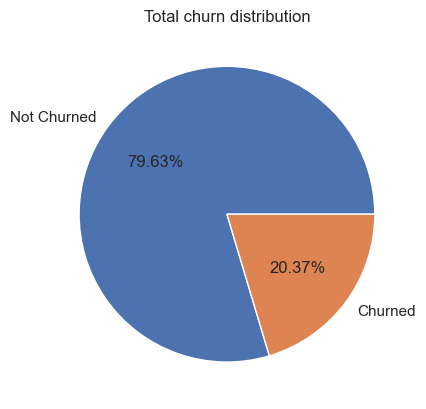

In [193]:
plt.pie(churn_counts, labels=['Not Churned','Churned'], autopct='%1.2f%%')
plt.title('Total churn distribution')
plt.show()

- Majority of the customers (~80%) continue to use the service without churning. Only 20% churned.
- We can say that the data is imbalanced. 
- We can use SMOTE later to make a balanced datset for accurate prediction and compare results with the originally imbalanced dataset.

## 2. Gender

In [194]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### (a) Gender distribution among all customers

In [195]:
gender_counts = df['Gender'].value_counts()
gender_counts

Gender
Male      5457
Female    4543
Name: count, dtype: int64

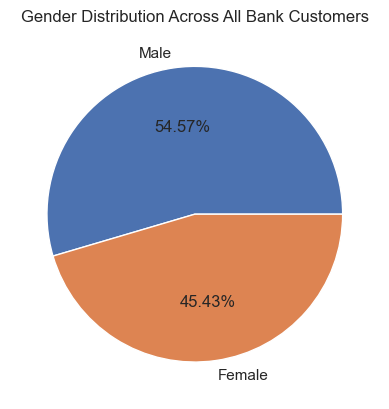

In [196]:
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.2f%%')
plt.title('Gender Distribution Across All Bank Customers')
plt.show()

### (b) Gender Distribution among Churned and Not Churned

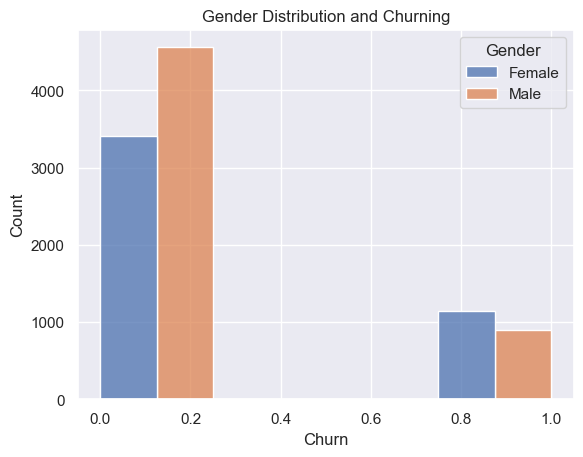

In [262]:
sns.histplot(df, x='Churn', hue='Gender', multiple='dodge', binwidth=0.25)
plt.title("Gender Distribution and Churning")
plt.show()

Gender distribution reveals that the majority of customers are male, while more churned customers are female.

## 3. Age

In [198]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


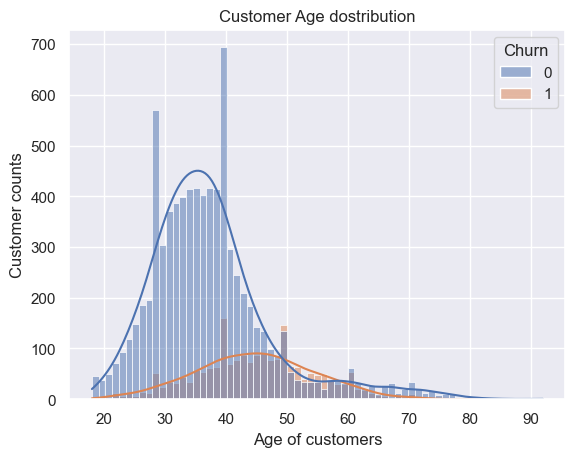

In [199]:
sns.histplot(data= df, x= 'Age', hue='Churn', kde=True)
plt.xlabel('Age of customers')
plt.ylabel('Customer counts')
plt.title('Customer Age dostribution')
plt.show()

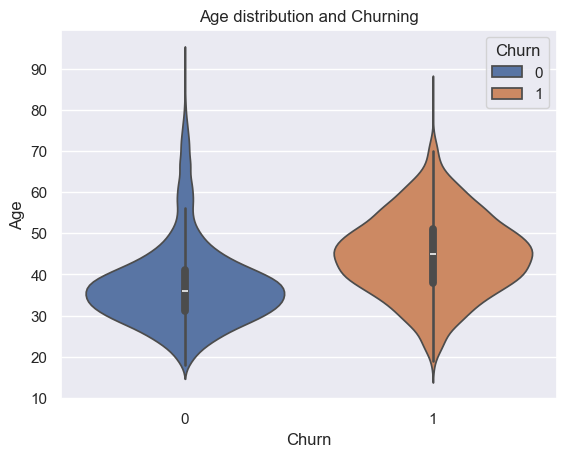

In [263]:
sns.violinplot(data=df, x='Churn', y='Age', hue='Churn')
plt.title("Age distribution and Churning")
plt.show()

Histogram and violin plot show that churn rates are higher among customers aged 40-50.

## 4. Geography

In [201]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [202]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [203]:
# Another method to find value_counts
df.groupby(['Geography']).count()['Churn']

Geography
France     5014
Germany    2509
Spain      2477
Name: Churn, dtype: int64

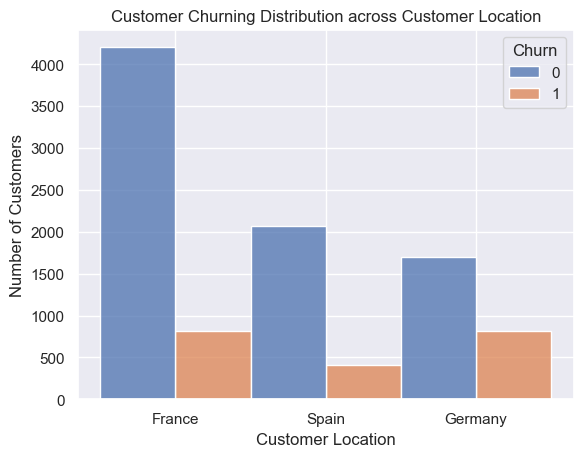

In [204]:
sns.histplot(data=df, x='Geography', hue='Churn',  multiple='dodge')
plt.xlabel('Customer Location')
plt.ylabel('Number of Customers')
plt.title('Customer Churning Distribution across Customer Location')
plt.show()

Most of the customers are located in France. However, the highest number of customers churned are from Germany, which also has minimum number of customers.

## 5. CreditScore

In [205]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Text(0.5, 1.0, 'Customer Churning wrt Credit Score')

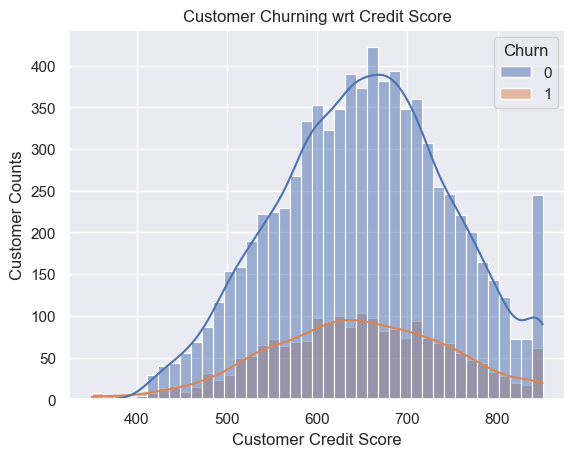

In [206]:
sns.histplot(data=df, x='CreditScore', hue='Churn', kde=True)
plt.xlabel('Customer Credit Score')
plt.ylabel('Customer Counts')
plt.title('Customer Churning wrt Credit Score')

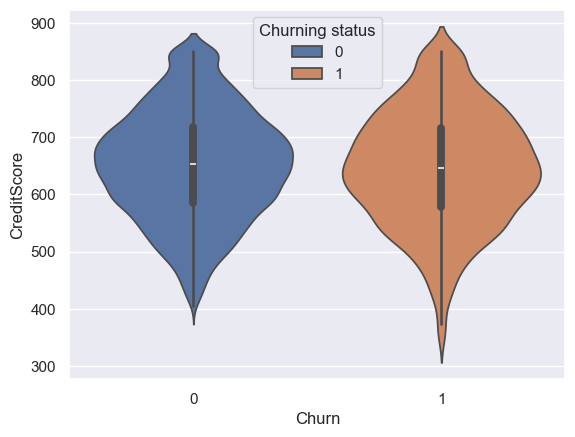

In [207]:
sns.violinplot(data=df, x= 'Churn', y= 'CreditScore', hue= 'Churn')
plt.legend(title='Churning status', loc= 'upper center')

Credit scores reflect the overall financial behaviour of a customer. Thus is surely can be a factor to predict churning. Some factors like older accounts, ontime loan/credit card payments etc increases the credit score of a customer. Which means, higher the credit score higher are the chances of stability, thus less chance of churning. The customers with low and high credit scores have lesser tendency of churning while the customers with intermediate credit score have higher tendency to churn. But the number of customers who did not churn also follow the same curve.

## 6. Tenure

In [208]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [209]:
df['Tenure'].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

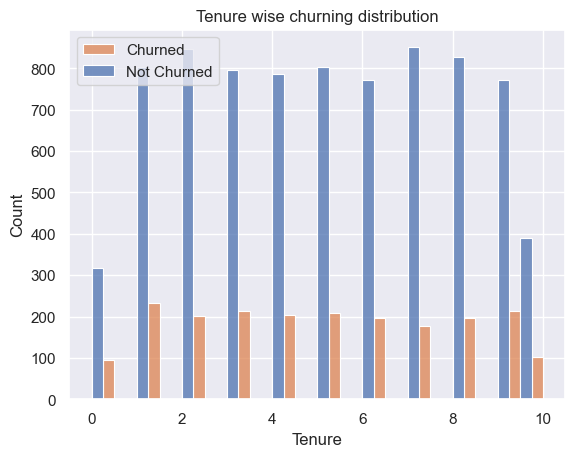

In [210]:
sns.histplot(data=df, x='Tenure', hue='Churn', multiple='dodge', binwidth=0.5).legend(['Churned', 'Not Churned'])
plt.title('Tenure wise churning distribution')
plt.show()

Customers with tenure very high (>9) seems less likely to churn. Same goes for the new customers. However, the customers with tenure 1-9 seem to churn highly.

## 7. Bank Balance

In [211]:
# Bank balance
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: xlabel='Balance', ylabel='Count'>

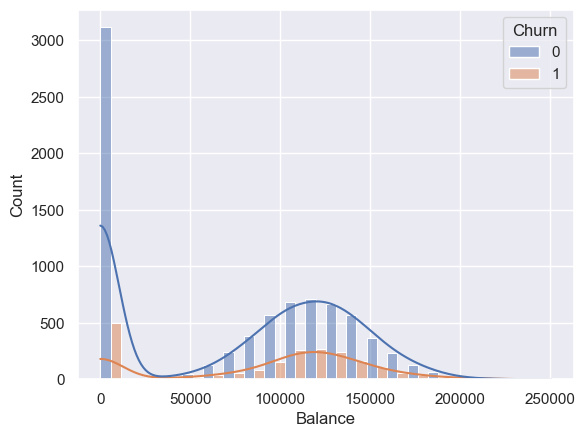

In [212]:
sns.histplot(data=df, x= 'Balance', hue='Churn', kde=True, multiple='dodge')

Customers with zero bank balance are highest among churners. Whereas the customers with very high bank balance (>1.5L) are less likely to leave the bank.

## 8. Number of Products

In [213]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Text(0.5, 1.0, 'Number of Products and Churn')

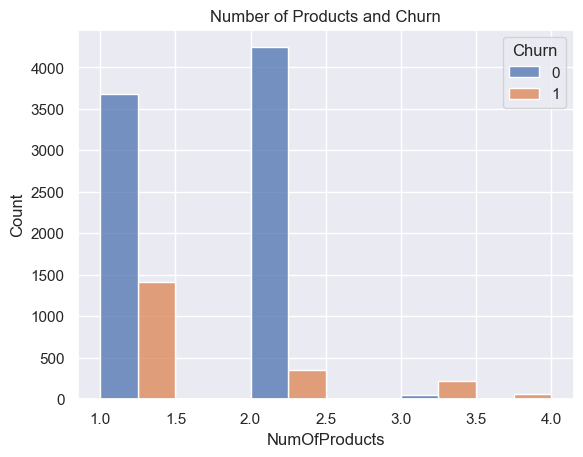

In [264]:
sns.histplot(data=df, x='NumOfProducts', hue='Churn', multiple='dodge', binwidth=0.5)
plt.title("Number of Products and Churn")


Most customers have 1-2 products, and this range is also prevalent among churners.

## 9. Has Credit Card

In [215]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Text(0.5, 1.0, 'Has Credit Card and Churn')

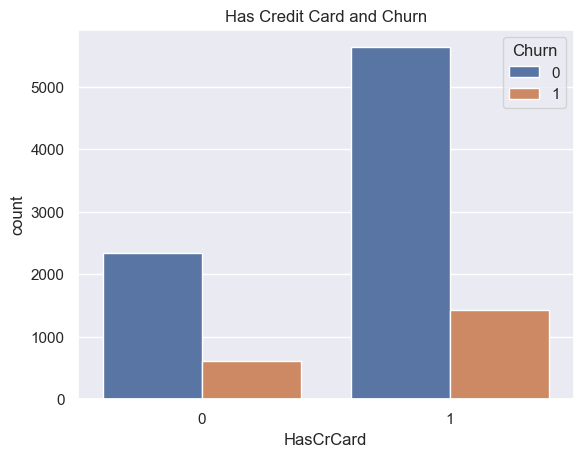

In [265]:
sns.countplot(data=df, x= 'HasCrCard', hue= 'Churn')
plt.title("Has Credit Card and Churn")

The majority of customers possess credit cards. In both churn and non-churn groups, those with credit cards are more prevalent.

## 10. Is Active Member

In [217]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Text(0.5, 1.0, 'Is Active Member and Churn')

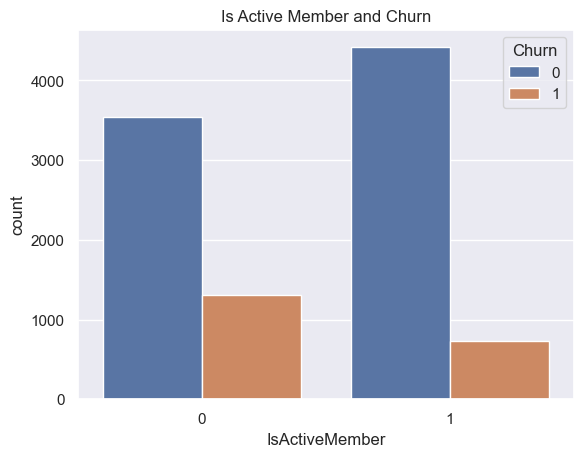

In [267]:
sns.countplot(df, x='IsActiveMember', hue= 'Churn')
plt.title("Is Active Member and Churn")


Churners seems to be less active. However, the active memebers churning is also considerable.

## 11. Estimated Salary

In [219]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Text(0.5, 1.0, 'Estimated Salary and Churn')

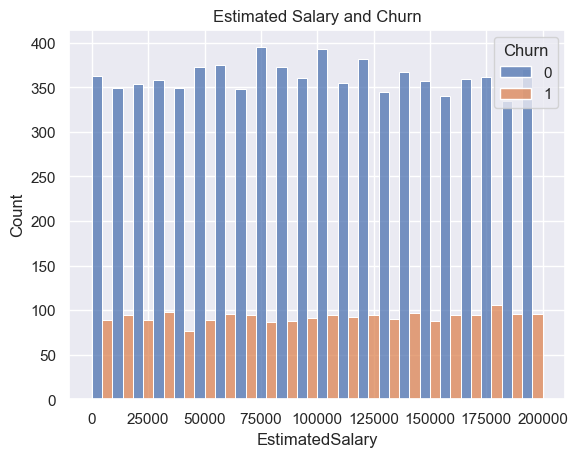

In [268]:
sns.histplot(df, x='EstimatedSalary', hue='Churn', multiple='dodge')
plt.title("Estimated Salary and Churn")

Churning pattern seems similar among all the salary ranges.

## Encoding

There are two columns Geography and Gender which are object type and need to be encoded. The type of encoding depends on the model we are going to use for prediction. The Categorical data is converted to numerical values so that our ML model can understand it.
1. Linear models: For linear models numerical values has meaning- equivalent to their magnitude.Thus one-hot-encoding is used. For example, if male and female are encoded as 1 and 0, then it will take 1 > 0 and train model accordingly, which will obviously not give the correct result.
2. DT, RF, XGBoosts have no problem with label encoding because they do not use order of categories directly.

So, we are going to perform one-hot-encoding, so that we can fit on different models and compare the accuracy.

In [221]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


There are two ways to perform one hot encoding. Using pd.get_dummies and sklearn.preprocessing.OneHotEncoding.

**One hot Econding using Pandas**

In [222]:
# One hot encoding using pandas
df_encoded_pd = pd.get_dummies(df, columns=['Geography', 'Gender']).astype(int)

In [223]:
df_encoded_pd.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0,1,1,1,101348,1,1,0,0,1,0
1,608,41,1,83807,1,0,1,112542,0,0,0,1,1,0
2,502,42,8,159660,3,1,0,113931,1,1,0,0,1,0
3,699,39,1,0,2,0,0,93826,0,1,0,0,1,0
4,850,43,2,125510,1,1,1,79084,0,0,0,1,1,0


**One hot encoding using sklearn**

In [224]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [225]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

sk_encoded = encoder.fit_transform(df[['Geography', 'Gender']])
df_sk = pd.DataFrame(sk_encoded, columns=encoder.get_feature_names_out())
df_encoded_sk = pd.concat([df.drop(columns=['Geography', 'Gender']), df_sk], axis=1)

In [226]:
df_encoded_sk.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0,1.0,0.0


# Normalization

- We have column values that range widely different. For efficient model generation and convergence using Gradient decsent we must scale them to a uniform level. As the data range varies widely and units are also not the same, we will use StandaedScaler for normalization. Standard Scler or Z-score normalization makes the data distribution uniform for features. When we fit the model, it stores the mean and SD for each column. When we transform the data, it normalizes the columns by subtracting with their mean and dividing by their respective SD.

- We will apply the normalization on features [CreditScore, Age, Balance, EstimatedSalary]. We have already encoded the categorical features, so there is no need to scale them.

In [227]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
model = scaler.fit_transform(df_encoded_pd[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']])
# model_transformed = scaler.transform(df_encoded_pd)

normalized_df = pd.DataFrame(model, columns= scaler.get_feature_names_out())

# Concat with other columns as well

normalized_df_concat = pd.concat([df_encoded_pd.drop(columns=['CreditScore', 'Age', 'Balance', 'EstimatedSalary']),normalized_df], axis=1)

In [228]:
normalized_df_concat.head()

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Churn,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Balance,EstimatedSalary
0,2,1,1,1,1,1,0,0,1,0,-0.326221,0.293517,-1.225847,0.021880
1,1,1,0,1,0,0,0,1,1,0,-0.440036,0.198164,0.117342,0.216532
2,8,3,1,0,1,1,0,0,1,0,-1.536794,0.293517,1.333050,0.240686
3,1,2,0,0,0,1,0,0,1,0,0.501521,0.007457,-1.225847,-0.108920
4,2,1,1,1,0,0,0,1,1,0,2.063884,0.388871,0.785723,-0.365269


In [229]:
normalized_df_concat.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,10000.0,5.012800e+00,2.892174,0.000000,3.000000,5.000000,7.000000,10.000000
NumOfProducts,10000.0,1.530200e+00,0.581654,1.000000,1.000000,1.000000,2.000000,4.000000
HasCrCard,10000.0,7.055000e-01,0.455840,0.000000,0.000000,1.000000,1.000000,1.000000
IsActiveMember,10000.0,5.151000e-01,0.499797,0.000000,0.000000,1.000000,1.000000,1.000000
Churn,10000.0,2.037000e-01,0.402769,0.000000,0.000000,0.000000,0.000000,1.000000
Geography_France,10000.0,5.014000e-01,0.500023,0.000000,0.000000,1.000000,1.000000,1.000000
Geography_Germany,10000.0,2.509000e-01,0.433553,0.000000,0.000000,0.000000,1.000000,1.000000
Geography_Spain,10000.0,2.477000e-01,0.431698,0.000000,0.000000,0.000000,0.000000,1.000000
Gender_Female,10000.0,4.543000e-01,0.497932,0.000000,0.000000,0.000000,1.000000,1.000000
Gender_Male,10000.0,5.457000e-01,0.497932,0.000000,0.000000,1.000000,1.000000,1.000000


In [230]:
normalized_df_concat.shape

(10000, 14)

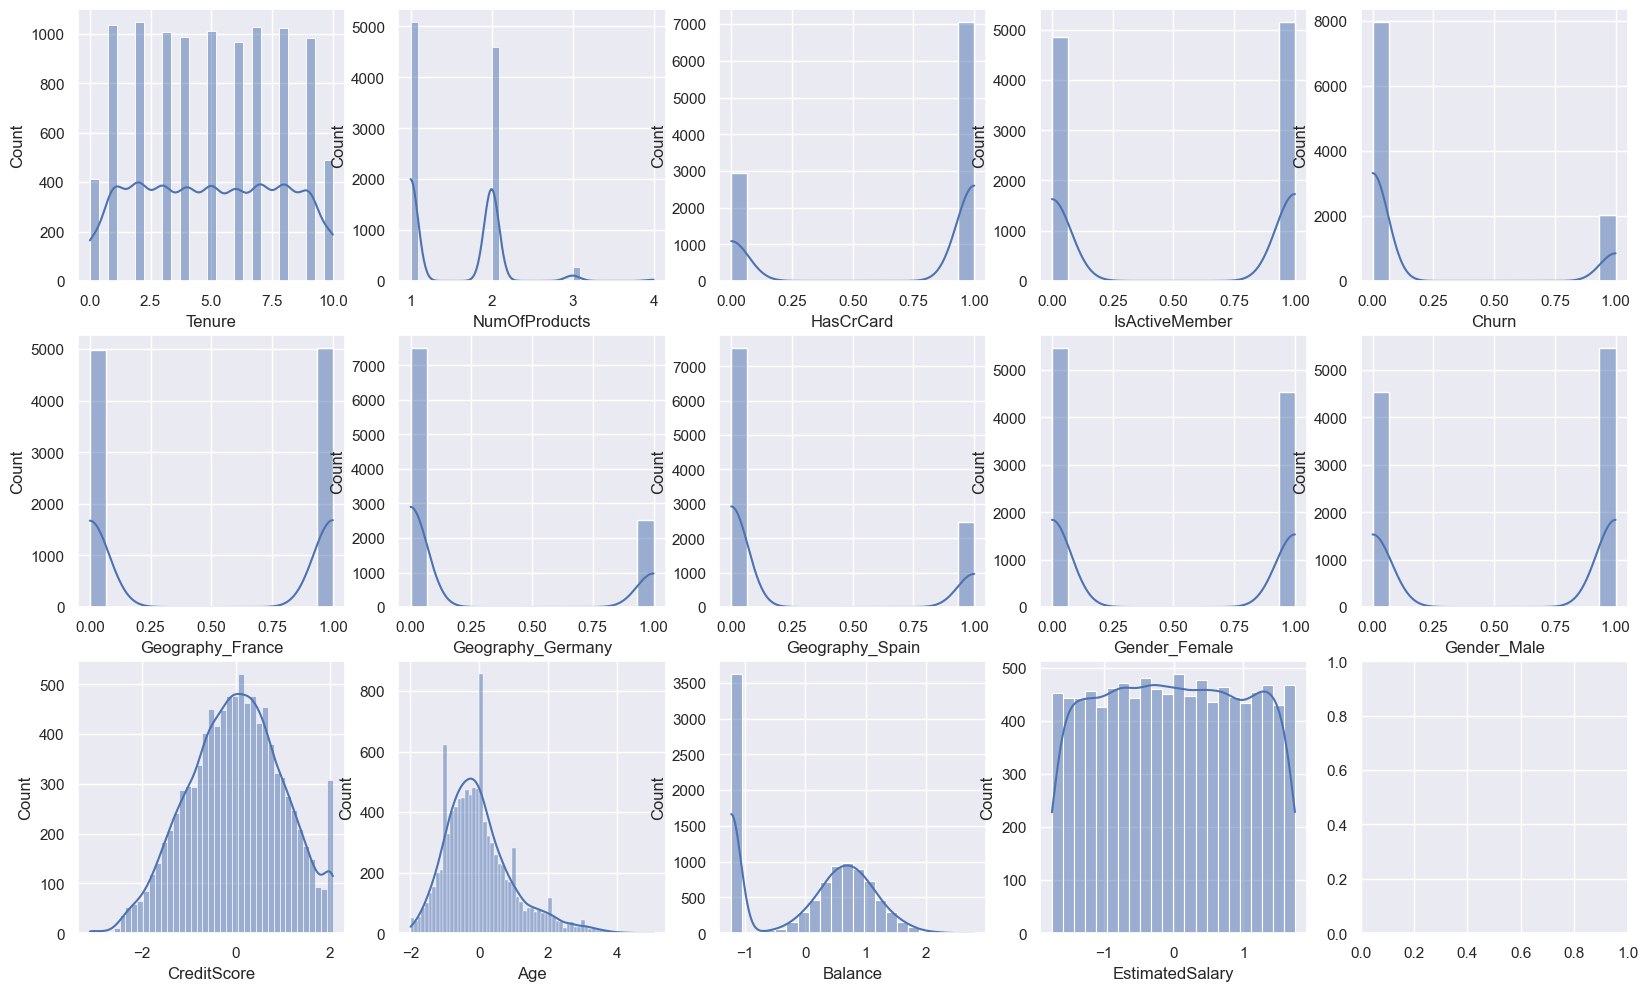

In [231]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20,12))

axes = axes.flatten()  # Flatten axes to make readable in for loop
for i, col in enumerate(normalized_df_concat.columns):
    sns.histplot(data=normalized_df_concat, x=col, ax=axes[i], kde=True)

All the features are scaled down to similar level although they were varying very widely before.

# Outliers

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Tenure'),
  Text(1, 0, 'NumOfProducts'),
  Text(2, 0, 'HasCrCard'),
  Text(3, 0, 'IsActiveMember'),
  Text(4, 0, 'Churn'),
  Text(5, 0, 'Geography_France'),
  Text(6, 0, 'Geography_Germany'),
  Text(7, 0, 'Geography_Spain'),
  Text(8, 0, 'Gender_Female'),
  Text(9, 0, 'Gender_Male'),
  Text(10, 0, 'CreditScore'),
  Text(11, 0, 'Age'),
  Text(12, 0, 'Balance'),
  Text(13, 0, 'EstimatedSalary')])

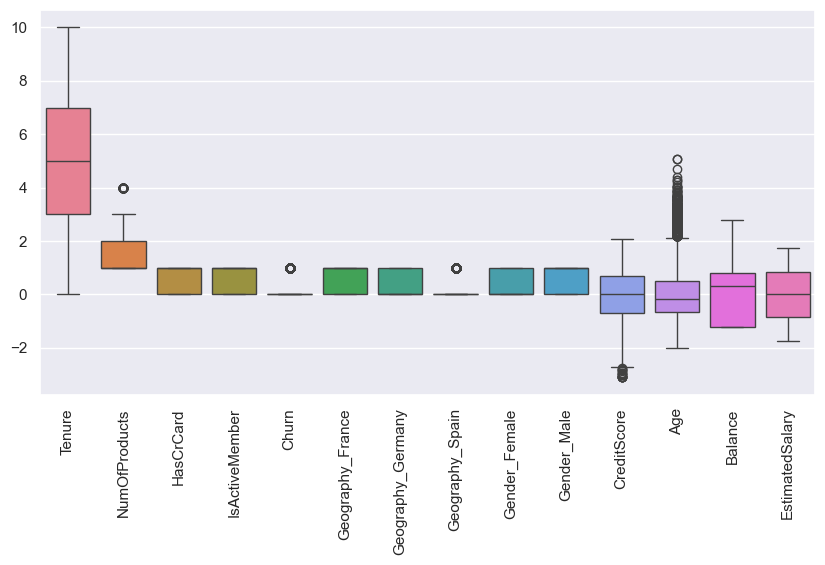

In [232]:
plt.figure(figsize=(10,5))
sns.boxplot(normalized_df_concat)
plt.xticks(rotation= 90)

All the outliers seems reasonable and doesn't seem like noise which should be removed.

# Correlation

To find if our features are independent or not we will plot correlation matrix.


In [233]:
from scipy import stats

((normalized_df_concat.corr()>0.5) & (normalized_df_concat.corr()!=1)).sum()

Tenure               0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
Churn                0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
Gender_Female        0
Gender_Male          0
CreditScore          0
Age                  0
Balance              0
EstimatedSalary      0
dtype: int64

<Axes: >

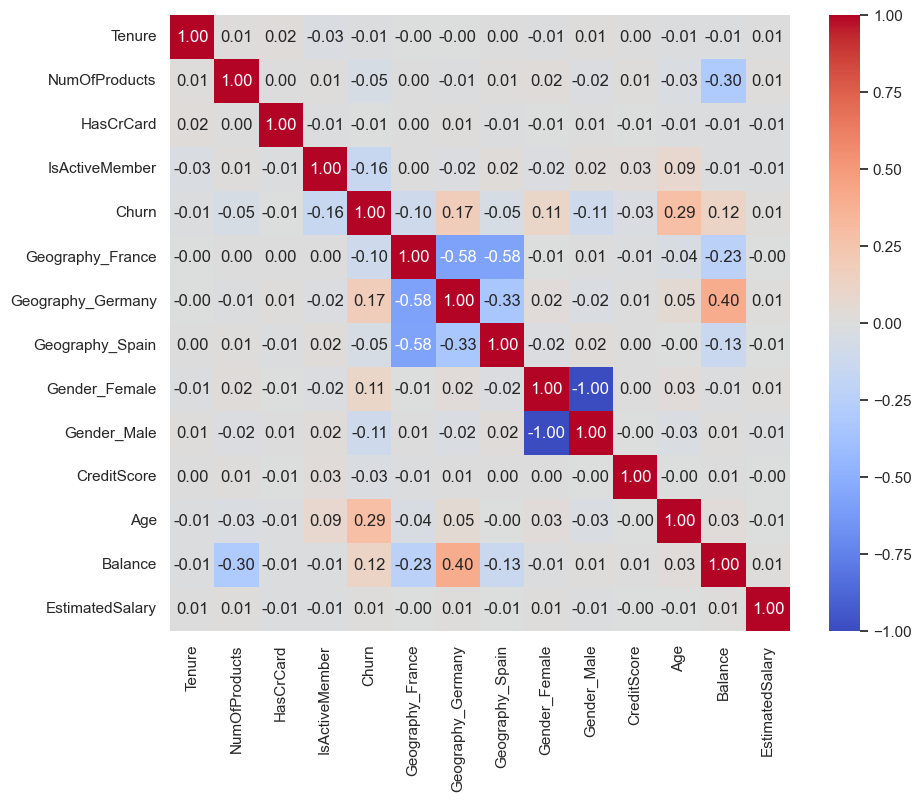

In [234]:
plt.figure(figsize=(10,8))
sns.heatmap(normalized_df_concat.corr(), cmap='coolwarm', annot=True, fmt='.2f')

- There is no significant correlation among features.

# Feature matrix and Target vector

In [235]:
X = normalized_df_concat.drop(columns='Churn')
X.head()

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Balance,EstimatedSalary
0,2,1,1,1,1,0,0,1,0,-0.326221,0.293517,-1.225847,0.021880
1,1,1,0,1,0,0,1,1,0,-0.440036,0.198164,0.117342,0.216532
2,8,3,1,0,1,0,0,1,0,-1.536794,0.293517,1.333050,0.240686
3,1,2,0,0,1,0,0,1,0,0.501521,0.007457,-1.225847,-0.108920
4,2,1,1,1,0,0,1,1,0,2.063884,0.388871,0.785723,-0.365269


In [236]:
y = normalized_df_concat['Churn']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Churn, dtype: int64

# Train-Test-Split

We split the dataset into training and testing sets to ensure fair evaluation of model performance.

In [237]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y) 

In [238]:
print(f"{X_train.shape=}, {y_train.shape=}\n{X_test.shape=}, {y_test.shape=}")

X_train.shape=(7500, 13), y_train.shape=(7500,)
X_test.shape=(2500, 13), y_test.shape=(2500,)


# Fitting the Model

Two models are employed for churn prediction:
1. Decision tree
2. Random forest

## 1. Decision Tree

In [239]:
X_train.head()

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Balance,EstimatedSalary
2618,1,2,0,0,1,0,0,1,0,-1.578181,-0.850726,-1.225847,0.620879
5231,6,3,1,0,1,0,0,0,1,1.774174,-0.087897,0.830262,-1.581369
2790,4,1,1,1,0,1,0,0,1,-1.143617,0.007457,0.814059,-1.459628
7345,5,1,1,1,1,0,0,0,1,0.708456,0.960993,0.471718,-1.457959
9723,7,1,0,0,1,0,0,0,1,-1.288472,-0.660018,0.786203,-0.231339


For hyperparameter tuning we are using grid serach with cross-valiadtion. This will help us provide the optimal parameter with enhanced model performance. 

In [240]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

grid = {'criterion': ['gini', 'entropy'],
        'max_depth': [3,4,5,6,7,8,9],
        'random_state': [None,42]
        }

grid_tree= GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid, cv=5)

grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'random_state': [None, 42]})

In [241]:
grid_tree.best_params_  # Get best hyperparameters

{'criterion': 'gini', 'max_depth': 7, 'random_state': None}

In [242]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth= 6, random_state=None).fit(X_train, y_train)  # Train model for best hyperparameters

In [243]:
acc_dtree = dtree.score(X_test, y_test)  # Accuracy of DT model
print(f"Accuracy of DT: {acc_dtree}")

Accuracy of DT: 0.8588


In [244]:
y_dtree = dtree.predict(X_test)  # Predict y using DT model

## 2. Random Forest

Similar hyperparameter tuning will be conducted for the Random Forest model.

In [245]:
from sklearn.ensemble import RandomForestClassifier


grid2 = {'max_depth': [3,4,5,6,7,8,9,10],
           'criterion': ['gini', 'entropy'],
           'random_state': [None,42], 
           }

grid_rf = GridSearchCV(estimator=RandomForestClassifier(), grid2, cv=5)

grid_rf.fit(X_train, y_train)

SyntaxError: positional argument follows keyword argument (2747651413.py, line 9)

In [82]:
grid_rf.best_params_  # Get best fitted hyperparameters

{'criterion': 'entropy', 'max_depth': 10, 'random_state': None}

In [170]:
rf_model = RandomForestClassifier(criterion= 'entropy', max_depth= 10, random_state= None).fit(X_train, y_train)  # Train model using best hyperparameters

acc_rf = rf_model.score(X_test, y_test)
print(f"Accuracy of RF: {acc_rf}")

Accuracy of RF: 0.87


In [88]:
y_rf = rf_model.predict(X_test)  # Predicted y using RF model

The accuracies of all the three models are as follows:

1. Decision tree: 86.64%
2. Random forest: 87%

Accuracies of DT and RF are more or less similar.

# Model Evaluations

## 1. Confusion matrix
Confusion matrix shows the true positives, true negatives, false positives, and false negatives for both models.

Text(0.5, 1.0, 'Confusion Matrix for Random Forest Model')

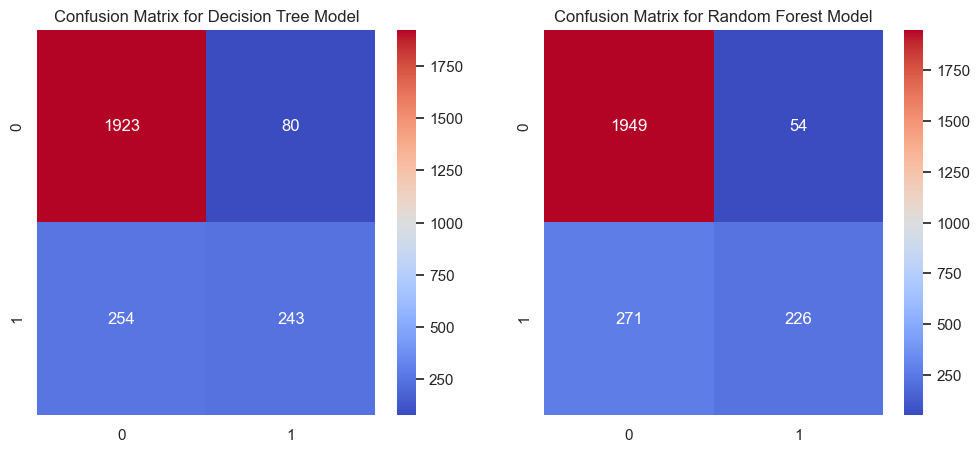

In [96]:
from sklearn.metrics import confusion_matrix

figure, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,5))

cm_dtree = confusion_matrix(y_test, y_dtree)
cm_rf = confusion_matrix(y_test, y_rf)

sns.heatmap(cm_dtree, annot=True, fmt='g', cmap='coolwarm', ax=axes[0])
axes[0].set_title('Confusion Matrix for Decision Tree Model')

sns.heatmap(cm_rf, ax=axes[1], annot=True, fmt='g', cmap='coolwarm' )
axes[1].set_title('Confusion Matrix for Random Forest Model')


## 2. Classification Report

- To get scores: Precision, Recall, and F1-Score. To understand the report, we should know that:
  1. Lower the precision means higher is the chances of false positives.(i.e. predicting many churn even when not churned).
  2. Lower the recall means higher is the chances of false negatives. (i.e. unable to predict the many churned ones as churned).
  3. F1-score finds a balance between precision and recall. Lower F1 score means, it is struggling to balance between precision and recall.

- Higher the metrics values, good is the prediction model.

In [162]:
from sklearn.metrics import classification_report

cr_dtree = classification_report(y_test, y_dtree, output_dict=True)
print(f'Classification Report for Decision Tree Model:\n {cr_dtree}')

Classification Report for Decision Tree Model:
 {'0': {'precision': 0.8833256775378961, 'recall': 0.9600599101347979, 'f1-score': 0.9200956937799043, 'support': 2003.0}, '1': {'precision': 0.7523219814241486, 'recall': 0.48893360160965793, 'f1-score': 0.5926829268292683, 'support': 497.0}, 'accuracy': 0.8664, 'macro avg': {'precision': 0.8178238294810224, 'recall': 0.724496755872228, 'f1-score': 0.7563893103045862, 'support': 2500.0}, 'weighted avg': {'precision': 0.8572821427504832, 'recall': 0.8664, 'f1-score': 0.8550060357101178, 'support': 2500.0}}


In [163]:
cr_rf = classification_report(y_test, y_rf, output_dict=True)
print(f"Classification Report for RF model: \n{cr_rf}")

Classification Report for RF model: 
{'0': {'precision': 0.877927927927928, 'recall': 0.9730404393409885, 'f1-score': 0.9230404925408477, 'support': 2003.0}, '1': {'precision': 0.8071428571428572, 'recall': 0.45472837022132795, 'f1-score': 0.5817245817245817, 'support': 497.0}, 'accuracy': 0.87, 'macro avg': {'precision': 0.8425353925353926, 'recall': 0.7138844047811582, 'f1-score': 0.7523825371327147, 'support': 2500.0}, 'weighted avg': {'precision': 0.863855855855856, 'recall': 0.87, 'f1-score': 0.855186889470574, 'support': 2500.0}}


For Customer churn prediction it is very important to not miss any class '1' prediction. This means that our recall should be high and FN should be low. 
But as per the classification report, the recall for class '1' is low in both the models- 0.49 and 0.45.
The lower F1-score for class '1' also indicates difficulty while balancing the recall and precision. This may be due to the imbalanced data with nearly 80%-20% ratio between class '0' and class '1'. 
The Accuracy was observed higher due to the 80% of class '0' data. 

We will check if balancing the dataset may help improve the recall or not. For this we will perform SMOTE analsyis on our training data and then check various metrics on original test data.

# SMOTE Analysis

In [99]:
from imblearn.over_sampling import SMOTE

sm= SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [100]:
X_train_sm.shape

(11920, 13)

In [246]:
y_train_sm.shape

(11920,)

In [247]:
y_train_sm.value_counts()

Churn
0    5960
1    5960
Name: count, dtype: int64

After performing SMOTE our training dataset is now balanced. Let's train the models again.

So, our data includes:
1. training data: X_train_sm, y_train_sm
2. testing data: X_test, y_test

# Retraining models

## 1. Decision tree smote model

Grid search cv is used for hyperparameter tuning. The training dataset is changed based on SMOTE analysis.

In [248]:
grid = {'criterion': ['gini', 'entropy'],
        'max_depth': [3,4,5,6,7,8,9],
        'random_state': [None,42]
        }

grid_tree_sm= GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid, cv=5)

grid_tree_sm.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'random_state': [None, 42]})

In [249]:
grid_tree_sm.best_params_  # Get optimized hyperparameters

{'criterion': 'entropy', 'max_depth': 9, 'random_state': 42}

In [250]:
dtree_sm = DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=42).fit(X_train_sm, y_train_sm)  # Train model based on optimized hyperparameters

In [251]:
acc_dtree_smote = dtree_sm.score(X_test, y_test)  # Accuracy of DT SMOTE model
acc_dtree_smote

0.8396

In [252]:
y_dtree_sm = dtree_sm.predict(X_test)  # y predicted using DT SMOTE model

In [253]:
cr_dtree_smote = classification_report(y_dtree_sm, y_test, output_dict=True)

print(cr_dtree_smote)  # Recall, precision, and f1 score

{'0': {'precision': 0.8648785425101214, 'recall': 0.9272924579489962, 'f1-score': 0.8949986907567427, 'support': 1843.0}, '1': {'precision': 0.7442748091603053, 'recall': 0.593607305936073, 'f1-score': 0.6604572396274344, 'support': 657.0}, 'accuracy': 0.8396, 'macro avg': {'precision': 0.8045766758352133, 'recall': 0.7604498819425346, 'f1-score': 0.7777279651920885, 'support': 2500.0}, 'weighted avg': {'precision': 0.8331838813857898, 'recall': 0.8396, 'f1-score': 0.8333611973999605, 'support': 2500.0}}


## 2. Random forest

Similarly, random forest model is also trained with smote training dataset along with hyperparameter tuning.

In [254]:
grid2 = {'max_depth': [3,4,5,6,7,8,9,10],
           'criterion': ['gini', 'entropy'],
           'random_state': [None,42] 
           }

grid_rf_sm = GridSearchCV(RandomForestClassifier(), param_grid=grid2, cv=5)

grid_rf_sm.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'random_state': [None, 42]})

In [255]:
grid_rf_sm.best_params_ # Get optimized hyperparameters

{'criterion': 'gini', 'max_depth': 10, 'random_state': 42}

In [256]:
grid_rf_sm = RandomForestClassifier(criterion='gini', max_depth=10, random_state=42).fit(X_train_sm, y_train_sm) # Train model based on optimized hyperparameters

In [257]:
y_rf_sm = grid_rf_sm.predict(X_test)  # y predicted using RF SMOTE model

In [258]:
cr_rf_smote = classification_report(y_rf_sm, y_test, output_dict=True)  # Recall, precision, and f1 score
print(cr_rf_smote)

{'0': {'precision': 0.902834008097166, 'recall': 0.9429175475687104, 'f1-score': 0.922440537745605, 'support': 1892.0}, '1': {'precision': 0.7938931297709924, 'recall': 0.6842105263157895, 'f1-score': 0.734982332155477, 'support': 608.0}, 'accuracy': 0.88, 'macro avg': {'precision': 0.8483635689340792, 'recall': 0.8135640369422499, 'f1-score': 0.828711434950541, 'support': 2500.0}, 'weighted avg': {'precision': 0.8763395864882405, 'recall': 0.88, 'f1-score': 0.8768507021460858, 'support': 2500.0}}


In [259]:
acc_rf_smote = grid_rf_sm.score(X_test, y_test)  # Accuracy of RF smote model
acc_rf_smote

0.88

In [260]:
type(cr_rf_smote)

dict

In [261]:
# Extract relevant metrics
data = {
    'Model': ['Decision Tree', 'Random Forest', 'Decision Tree (SMOTE)', 'Random Forest (SMOTE)'],
    'Precision': [cr_dtree['1']['precision'], 
                  cr_rf['1']['precision'], 
                  cr_dtree_smote['1']['precision'], 
                  cr_dtree_smote['1']['precision']],
    'Recall': [cr_dtree['1']['recall'], 
               cr_rf['1']['recall'], 
               cr_dtree_smote['1']['recall'], 
               cr_rf_smote['1']['recall']],
    'F1-Score': [cr_dtree['1']['f1-score'], 
                 cr_rf['1']['f1-score'], 
                 cr_dtree_smote['1']['f1-score'], 
                 cr_rf_smote['1']['f1-score']],
    'Accuracy': [acc_dtree,
                acc_rf,
                acc_dtree_smote,
                acc_rf_smote]
    
   
}

# Create DataFrame
results_df = pd.DataFrame(data)
results_df

,Model,Precision,Recall,F1-Score,Accuracy
0,Decision Tree,0.752322,0.488934,0.592683,0.8588
1,Random Forest,0.807143,0.454728,0.581725,0.8700
2,Decision Tree (SMOTE),0.744275,0.593607,0.660457,0.8396
3,Random Forest (SMOTE),0.744275,0.684211,0.734982,0.8800



Precision tells us how good the model is at making correct positive predictions:

- The Random Forest model shines here, correctly predicting 87% of churners. It’s a reliable choice when it does say someone is likely to churn.

Recall shows how many actual churners the model can spot:
- The Random Forest with SMOTE does best in this category, catching 68.4% of actual churners. This means it's better at identifying customers who might leave.

F1-Score balances precision and recall:
- The Random Forest with SMOTE gets the highest F1-score (73.4%), indicating it does a good job of balancing being accurate and catching churners.

Accuracy reflects overall correct predictions:
- All models perform well here, ranging from 83.9% to 88.0%. However, in imbalanced data, its important to look at precision and recall too.

So, if we want to be sure about churn predictions, we will go with the Random Forest for its high precision. If spotting churners is our priority, the Random Forest with SMOTE is better. For a balanced approach, consider the Random Forest with SMOTE; it gives a good mix of catching churners while still being accurate.